Text Visualization after cleaning (Article Text and Headline)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Cleaned_News_Articles_Final2.csv")
df.head()

df['text'] = df['text'].astype(str)
df['headline'] = df['headline'].astype(str)

Word Frequency

In [2]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ChokJoe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Article Text

In [3]:
# tokenize using NLTK
corpus = [word_tokenize(text) for text in df['text']]

# flatten the list of tokens
corpus_flat = [word for sublist in corpus for word in sublist]

# compute word frequencies 
word_freq = FreqDist(corpus_flat)

# convert FreqDist 
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['word', 'count']).sort_values(by='count', ascending=False)

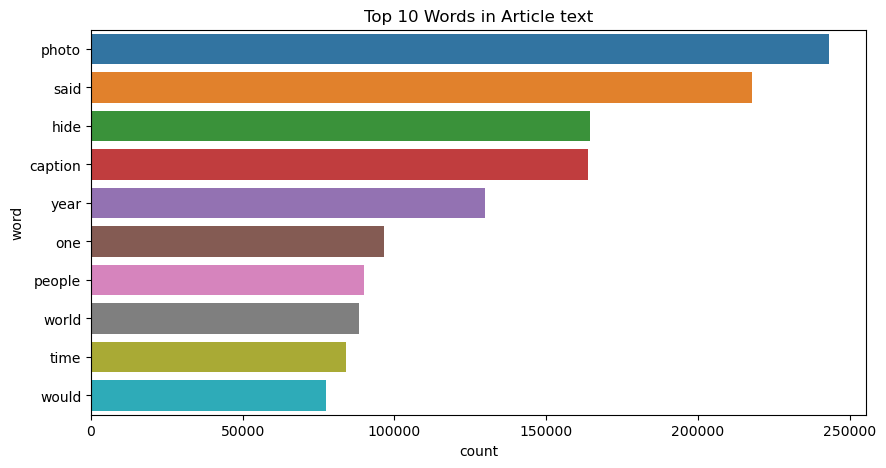

In [6]:
plt.figure(figsize=(10,5))
sns.barplot(x='count',y='word',data=word_freq_df.head(10))
plt.title('Top 10 Words in Article text')
plt.show()

Headline

In [7]:
# tokenize using NLTK
corpus2 = [word_tokenize(text) for text in df['headline']]

# flatten the list of tokens
corpus_flat2 = [word for sublist in corpus2 for word in sublist]

# compute word frequencies 
word_freq2 = FreqDist(corpus_flat2)

# convert FreqDist 
word_freq_df2 = pd.DataFrame(list(word_freq2.items()), columns=['word', 'count']).sort_values(by='count', ascending=False)

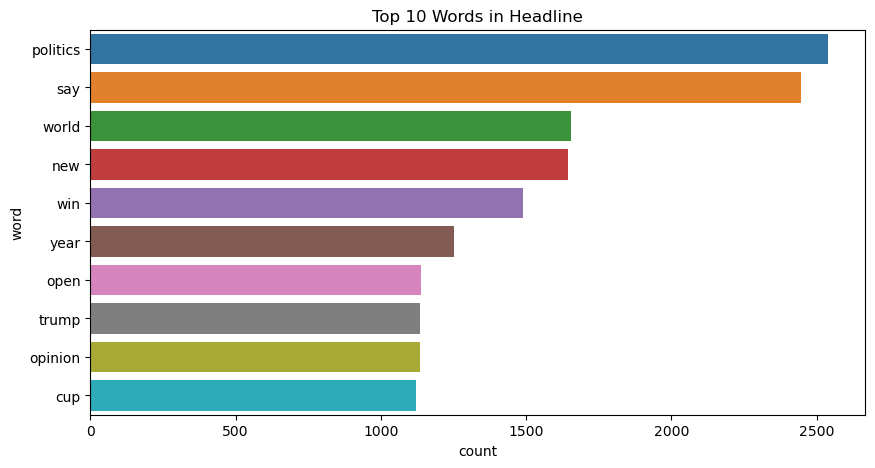

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x='count',y='word',data=word_freq_df2.head(10))
plt.title('Top 10 Words in Headline')
plt.show()

Word Cloud

In [9]:
from wordcloud import WordCloud
all_text = ' '.join(df['text'])
all_headline = ' '.join(df['headline'])

Word Cloud on Article text column only

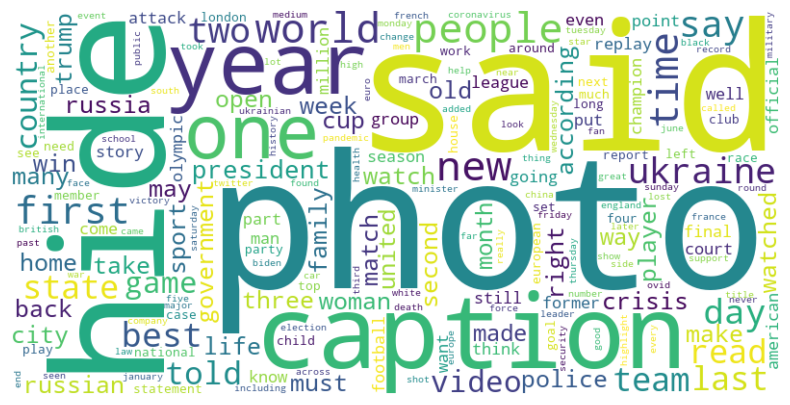

In [10]:
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Word Cloud on Headline column only

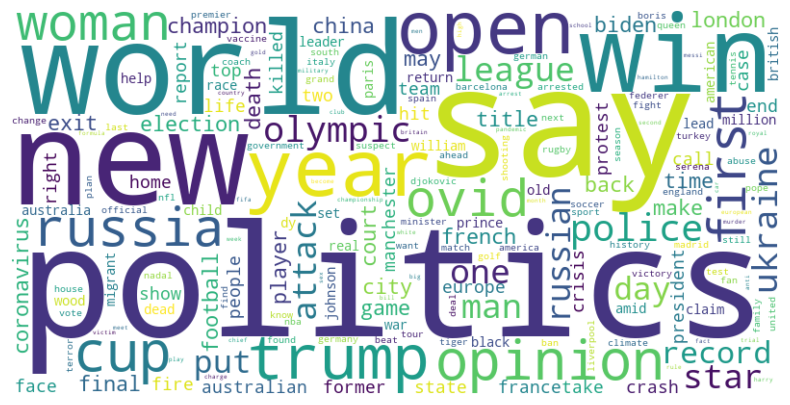

In [11]:
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(all_headline)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

N-gram Exploration

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

<Axes: >

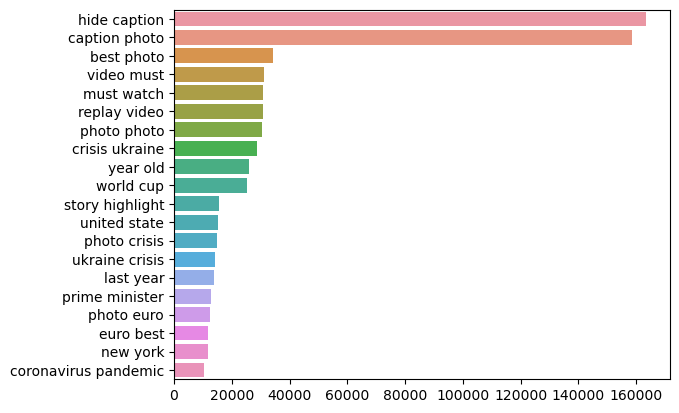

In [13]:
def _get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                    for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

top_n_bigrams=_get_top_ngram(df['text'],2)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

<Axes: >

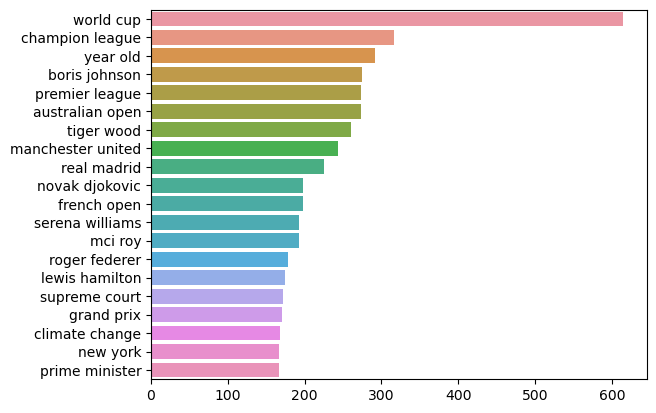

In [14]:
def _get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                    for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

top_n_bigrams=_get_top_ngram(df['headline'],2)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)